##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE188737**

file previously downloaded:
* GSE188737_hnscc_seu.RData.gz
* GSE188737_metacells.csv.gz

unzipped both using gunzip

info below from PMID 36973261

Dataset should contain data from HNSCC --> 14 treatment naive patients with locally advanced, HPV-negative HNSCC from primary and cervical lymph nodes (primary tumour and nodal metastasis) --> 7 patients each with primary and mets
* data also includes TCR seq and sequencing on cell lines established from the patients (will need to exclude these)

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE188737')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE188737"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [4]:
load("GSE188737_hnscc_seu.RData")
counts <- hnscc_seu@assays$RNA@counts
meta.data <- hnscc_seu@meta.data
seu <- CreateSeuratObject(counts=counts, meta.data=meta.data)

In [5]:
seu

An object of class Seurat 
23148 features across 53459 samples within 1 assay 
Active assay: RNA (23148 features, 0 variable features)
 1 layer present: counts

In [6]:
head(seu@meta.data)

orig.ident nCount_RNA nFeature_RNA sampleID percent.mt
AAAGCAACAAGCGCTC-1 10X_hn     1900        991         1        3.105263  
AAGTCTGAGGTGCTAG-1 10X_hn     1057        696         1        9.082308  
ACCAGTACATCTACGA-1 10X_hn     5465       2312         1        4.299305  
ACGAGGAGTCGCGAAA-1 10X_hn     3180       1530         1        5.345912  
ACTGATGGTACTTCTT-1 10X_hn     5802       2475         1        3.152998  
AGCCTAAAGGTTCCTA-1 10X_hn     2281       1189         1        7.756354  
                   origin patientID P_Mid seurat_clusters genecount cell_type
AAAGCAACAAGCGCTC-1 HN237P HN237     P     0               500-1000  CAFs     
AAGTCTGAGGTGCTAG-1 HN237P HN237     P     0               500-1000  CAFs     
ACCAGTACATCTACGA-1 HN237P HN237     P     0               1000-3000 CAFs     
ACGAGGAGTCGCGAAA-1 HN237P HN237     P     0               1000-3000 CAFs     
ACTGATGGTACTTCTT-1 HN237P HN237     P     0               1000-3000 CAFs     
AGCCTAAAGGTTCCTA-1 HN237P HN237     P     0               1000-3000 CAFs

In [9]:
table(seu$patientID)
table(seu$sampleID)
table(seu$origin)


HN237 HN242 HN251 HN257 HN263 HN272 HN279 
 3785  3553 11308  8076  9900 10391  6446 


   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
1011 2774 1226 2327 6137 5171 4240 3836 3331 6569 4251 6140 2584 3862 


HN237M HN237P HN242M HN242P HN251M HN251P HN257M HN257P HN263M HN263P HN272M 
  2774   1011   2327   1226   5171   6137   3836   4240   6569   3331   6140 
HN272P HN279M HN279P 
  4251   3862   2584 

Samples:
* HN237M --> patient 237 metastatic lymph node
* HN237P --> patient 237 primary HNSCC
* HN242M --> patient 242 metastatic lymph node
* HN242P --> patient 242 primary HNSCC
* HN251M --> patient 251 metastatic lymph node
* HN251P --> patient 251 primary HNSCC
* HN257M --> patient 257 metastatic lymph node
* HN257P --> patient 257 primary HNSCC
* HN263M --> patient 263 metastatic lymph node
* HN263P --> patient 263 primary HNSCC
* HN272M --> patient 272 metastatic lymph node
* HN272P --> patient 272 primary HNSCC
* HN279M --> patient 279 metastatic lymph node
* HN279P --> patient 279 primary HNSCC

In [12]:
#seperate each sample in to its own seurat object
HN237P <- subset(seu, subset = origin %in% c("HN237P"))
HN242P <- subset(seu, subset = origin %in% c("HN242P"))
HN251P <- subset(seu, subset = origin %in% c("HN251P"))
HN257P <- subset(seu, subset = origin %in% c("HN257P"))
HN263P <- subset(seu, subset = origin %in% c("HN263P"))
HN272P <- subset(seu, subset = origin %in% c("HN272P"))
HN279P <- subset(seu, subset = origin %in% c("HN279P"))
HN237M <- subset(seu, subset = origin %in% c("HN237M"))
HN242M <- subset(seu, subset = origin %in% c("HN242M"))
HN251M <- subset(seu, subset = origin %in% c("HN251M"))
HN257M <- subset(seu, subset = origin %in% c("HN257M"))
HN263M <- subset(seu, subset = origin %in% c("HN263M"))
HN272M <- subset(seu, subset = origin %in% c("HN272M"))
HN279M <- subset(seu, subset = origin %in% c("HN279M"))

In [13]:
table(HN237P$origin)
table(HN242P$origin)
table(HN251P$origin)
table(HN257P$origin)
table(HN263P$origin)
table(HN272P$origin)
table(HN279P$origin)

table(HN237M$origin)
table(HN242M$origin)
table(HN251M$origin)
table(HN257M$origin)
table(HN263M$origin)
table(HN272M$origin)
table(HN279M$origin)


HN237P 
  1011 


HN242P 
  1226 


HN251P 
  6137 


HN257P 
  4240 


HN263P 
  3331 


HN272P 
  4251 


HN279P 
  2584 


HN237M 
  2774 


HN242M 
  2327 


HN251M 
  5171 


HN257M 
  3836 


HN263M 
  6569 


HN272M 
  6140 


HN279M 
  3862 

In [14]:
head(colnames(HN237P))

[1] "AAAGCAACAAGCGCTC-1" "AAGTCTGAGGTGCTAG-1" "ACCAGTACATCTACGA-1"
[4] "ACGAGGAGTCGCGAAA-1" "ACTGATGGTACTTCTT-1" "AGCCTAAAGGTTCCTA-1"

In [15]:
#add dataset info to colnames
colnames(HN237P) <- paste0("GSE188737_HNSCC_HN237P_", colnames(HN237P))
colnames(HN242P) <- paste0("GSE188737_HNSCC_HN242P_", colnames(HN242P))
colnames(HN251P) <- paste0("GSE188737_HNSCC_HN251P_", colnames(HN251P))
colnames(HN257P) <- paste0("GSE188737_HNSCC_HN257P_", colnames(HN257P))
colnames(HN263P) <- paste0("GSE188737_HNSCC_HN263P_", colnames(HN263P))
colnames(HN272P) <- paste0("GSE188737_HNSCC_HN272P_", colnames(HN272P))
colnames(HN279P) <- paste0("GSE188737_HNSCC_HN279P_", colnames(HN279P))

colnames(HN237M) <- paste0("GSE188737_HNSCC_HN237M_", colnames(HN237M))
colnames(HN242M) <- paste0("GSE188737_HNSCC_HN242M_", colnames(HN242M))
colnames(HN251M) <- paste0("GSE188737_HNSCC_HN251M_", colnames(HN251M))
colnames(HN257M) <- paste0("GSE188737_HNSCC_HN257M_", colnames(HN257M))
colnames(HN263M) <- paste0("GSE188737_HNSCC_HN263M_", colnames(HN263M))
colnames(HN272M) <- paste0("GSE188737_HNSCC_HN272M_", colnames(HN272M))
colnames(HN279M) <- paste0("GSE188737_HNSCC_HN279M_", colnames(HN279M))

In [16]:
head(colnames(HN237P))
head(colnames(HN272P))
head(colnames(HN257M))

[1] "GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1"
[2] "GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1"
[3] "GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1"
[4] "GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1"
[5] "GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1"
[6] "GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1"

[1] "GSE188737_HNSCC_HN272P_AAACCTGCAGCTGTTA-11"
[2] "GSE188737_HNSCC_HN272P_AAACGGGAGCTTTGGT-11"
[3] "GSE188737_HNSCC_HN272P_AAACGGGCATACAGCT-11"
[4] "GSE188737_HNSCC_HN272P_AAAGATGAGAAACCAT-11"
[5] "GSE188737_HNSCC_HN272P_AAAGATGCACCGTTGG-11"
[6] "GSE188737_HNSCC_HN272P_AAAGCAAAGATATGGT-11"

[1] "GSE188737_HNSCC_HN257M_AAACGGGTCATGCATG-8"
[2] "GSE188737_HNSCC_HN257M_AAAGATGAGCAGATCG-8"
[3] "GSE188737_HNSCC_HN257M_AAAGCAAAGGCTCTTA-8"
[4] "GSE188737_HNSCC_HN257M_AAAGCAAGTCGCCATG-8"
[5] "GSE188737_HNSCC_HN257M_AAAGTAGCAGCGTTCG-8"
[6] "GSE188737_HNSCC_HN257M_AAAGTAGTCAGCGATT-8"

In [18]:
#add metadata to sample
HN237P@meta.data$sample_type <- "primary tumour"
HN237P@meta.data$cancer_type <- "HNSCC"
HN237P@meta.data$patient_id <- "Pt237"
HN237P@meta.data$sample_id <- "GSE188737_HNSCC_237_Primary"

In [19]:
#add metadata to sample
HN242P@meta.data$sample_type <- "primary tumour"
HN242P@meta.data$cancer_type <- "HNSCC"
HN242P@meta.data$patient_id <- "Pt242"
HN242P@meta.data$sample_id <- "GSE188737_HNSCC_242_Primary"

In [20]:
#add metadata to sample
HN251P@meta.data$sample_type <- "primary tumour"
HN251P@meta.data$cancer_type <- "HNSCC"
HN251P@meta.data$patient_id <- "Pt251"
HN251P@meta.data$sample_id <- "GSE188737_HNSCC_251_Primary"

In [21]:
#add metadata to sample
HN257P@meta.data$sample_type <- "primary tumour"
HN257P@meta.data$cancer_type <- "HNSCC"
HN257P@meta.data$patient_id <- "Pt257"
HN257P@meta.data$sample_id <- "GSE188737_HNSCC_257_Primary"

In [22]:
#add metadata to sample
HN263P@meta.data$sample_type <- "primary tumour"
HN263P@meta.data$cancer_type <- "HNSCC"
HN263P@meta.data$patient_id <- "Pt263"
HN263P@meta.data$sample_id <- "GSE188737_HNSCC_263_Primary"

In [23]:
#add metadata to sample
HN272P@meta.data$sample_type <- "primary tumour"
HN272P@meta.data$cancer_type <- "HNSCC"
HN272P@meta.data$patient_id <- "Pt272"
HN272P@meta.data$sample_id <- "GSE188737_HNSCC_272_Primary"

In [24]:
#add metadata to sample
HN279P@meta.data$sample_type <- "primary tumour"
HN279P@meta.data$cancer_type <- "HNSCC"
HN279P@meta.data$patient_id <- "Pt279"
HN279P@meta.data$sample_id <- "GSE188737_HNSCC_279_Primary"

In [25]:
#add metadata to sample
HN237M@meta.data$sample_type <- "LN mets"
HN237M@meta.data$cancer_type <- "HNSCC"
HN237M@meta.data$patient_id <- "Pt237"
HN237M@meta.data$sample_id <- "GSE188737_HNSCC_237_mets"

In [26]:
#add metadata to sample
HN242M@meta.data$sample_type <- "LN mets"
HN242M@meta.data$cancer_type <- "HNSCC"
HN242M@meta.data$patient_id <- "Pt242"
HN242M@meta.data$sample_id <- "GSE188737_HNSCC_242_mets"

In [27]:
#add metadata to sample
HN251M@meta.data$sample_type <- "LN mets"
HN251M@meta.data$cancer_type <- "HNSCC"
HN251M@meta.data$patient_id <- "Pt251"
HN251M@meta.data$sample_id <- "GSE188737_HNSCC_251_mets"

In [28]:
#add metadata to sample
HN257M@meta.data$sample_type <- "LN mets"
HN257M@meta.data$cancer_type <- "HNSCC"
HN257M@meta.data$patient_id <- "Pt257"
HN257M@meta.data$sample_id <- "GSE188737_HNSCC_257_mets"

In [29]:
#add metadata to sample
HN263M@meta.data$sample_type <- "LN mets"
HN263M@meta.data$cancer_type <- "HNSCC"
HN263M@meta.data$patient_id <- "Pt263"
HN263M@meta.data$sample_id <- "GSE188737_HNSCC_263_mets"

In [30]:
#add metadata to sample
HN272M@meta.data$sample_type <- "LN mets"
HN272M@meta.data$cancer_type <- "HNSCC"
HN272M@meta.data$patient_id <- "Pt272"
HN272M@meta.data$sample_id <- "GSE188737_HNSCC_272_mets"

In [31]:
#add metadata to sample
HN279M@meta.data$sample_type <- "LN mets"
HN279M@meta.data$cancer_type <- "HNSCC"
HN279M@meta.data$patient_id <- "Pt279"
HN279M@meta.data$sample_id <- "GSE188737_HNSCC_279_mets"

In [32]:
head(HN237P@meta.data)  
head(HN272P@meta.data)  
head(HN279M@meta.data)  

orig.ident nCount_RNA nFeature_RNA
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 10X_hn     1900        991        
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 10X_hn     1057        696        
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 10X_hn     5465       2312        
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 10X_hn     3180       1530        
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 10X_hn     5802       2475        
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 10X_hn     2281       1189        
                                          sampleID percent.mt origin patientID
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 1        3.105263   HN237P HN237    
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 1        9.082308   HN237P HN237    
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 1        4.299305   HN237P HN237    
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 1        5.345912   HN237P HN237    
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 1        3.152998   HN237P HN237    
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 1        7.756354   HN237P HN237    
                                          P_Mid seurat_clusters genecount
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 P     0               500-1000 
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 P     0               500-1000 
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 P     0               1000-3000
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 P     0               1000-3000
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 P     0               1000-3000
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 P     0               1000-3000
                                          cell_type sample_type    cancer_type
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 CAFs      primary tumour HNSCC      
                                          patient_id
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 Pt237     
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 Pt237     
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 Pt237     
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 Pt237     
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 Pt237     
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 Pt237     
                                          sample_id                  
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 GSE188737_HNSCC_237_Primary

orig.ident nCount_RNA nFeature_RNA
GSE188737_HNSCC_HN272P_AAACCTGCAGCTGTTA-11 10X_hn      651       449         
GSE188737_HNSCC_HN272P_AAACGGGAGCTTTGGT-11 10X_hn      724       507         
GSE188737_HNSCC_HN272P_AAACGGGCATACAGCT-11 10X_hn      494       372         
GSE188737_HNSCC_HN272P_AAAGATGAGAAACCAT-11 10X_hn      763       454         
GSE188737_HNSCC_HN272P_AAAGATGCACCGTTGG-11 10X_hn      416       296         
GSE188737_HNSCC_HN272P_AAAGCAAAGATATGGT-11 10X_hn     1766       972         
                                           sampleID percent.mt origin patientID
GSE188737_HNSCC_HN272P_AAACCTGCAGCTGTTA-11 11        3.379416  HN272P HN272    
GSE188737_HNSCC_HN272P_AAACGGGAGCTTTGGT-11 11        2.209945  HN272P HN272    
GSE188737_HNSCC_HN272P_AAACGGGCATACAGCT-11 11        6.275304  HN272P HN272    
GSE188737_HNSCC_HN272P_AAAGATGAGAAACCAT-11 11       10.222805  HN272P HN272    
GSE188737_HNSCC_HN272P_AAAGATGCACCGTTGG-11 11        7.692308  HN272P HN272    
GSE188737_HNSCC_HN272P_AAAGCAAAGATATGGT-11 11        5.889015  HN272P HN272    
                                           P_Mid seurat_clusters genecount
GSE188737_HNSCC_HN272P_AAACCTGCAGCTGTTA-11 P     0               300-500  
GSE188737_HNSCC_HN272P_AAACGGGAGCTTTGGT-11 P     0               500-1000 
GSE188737_HNSCC_HN272P_AAACGGGCATACAGCT-11 P     0               300-500  
GSE188737_HNSCC_HN272P_AAAGATGAGAAACCAT-11 P     0               300-500  
GSE188737_HNSCC_HN272P_AAAGATGCACCGTTGG-11 P     0               < 300    
GSE188737_HNSCC_HN272P_AAAGCAAAGATATGGT-11 P     0               500-1000 
                                           cell_type sample_type    cancer_type
GSE188737_HNSCC_HN272P_AAACCTGCAGCTGTTA-11 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN272P_AAACGGGAGCTTTGGT-11 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN272P_AAACGGGCATACAGCT-11 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN272P_AAAGATGAGAAACCAT-11 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN272P_AAAGATGCACCGTTGG-11 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN272P_AAAGCAAAGATATGGT-11 CAFs      primary tumour HNSCC      
                                           patient_id
GSE188737_HNSCC_HN272P_AAACCTGCAGCTGTTA-11 Pt272     
GSE188737_HNSCC_HN272P_AAACGGGAGCTTTGGT-11 Pt272     
GSE188737_HNSCC_HN272P_AAACGGGCATACAGCT-11 Pt272     
GSE188737_HNSCC_HN272P_AAAGATGAGAAACCAT-11 Pt272     
GSE188737_HNSCC_HN272P_AAAGATGCACCGTTGG-11 Pt272     
GSE188737_HNSCC_HN272P_AAAGCAAAGATATGGT-11 Pt272     
                                           sample_id                  
GSE188737_HNSCC_HN272P_AAACCTGCAGCTGTTA-11 GSE188737_HNSCC_272_Primary
GSE188737_HNSCC_HN272P_AAACGGGAGCTTTGGT-11 GSE188737_HNSCC_272_Primary
GSE188737_HNSCC_HN272P_AAACGGGCATACAGCT-11 GSE188737_HNSCC_272_Primary
GSE188737_HNSCC_HN272P_AAAGATGAGAAACCAT-11 GSE188737_HNSCC_272_Primary
GSE188737_HNSCC_HN272P_AAAGATGCACCGTTGG-11 GSE188737_HNSCC_272_Primary
GSE188737_HNSCC_HN272P_AAAGCAAAGATATGGT-11 GSE188737_HNSCC_272_Primary

orig.ident nCount_RNA nFeature_RNA
GSE188737_HNSCC_HN279M_AAACGGGGTTGCGTTA-14 10X_hn     14997      3540        
GSE188737_HNSCC_HN279M_AAAGATGAGTTACGGG-14 10X_hn      9351      2609        
GSE188737_HNSCC_HN279M_AAAGCAACAGCCTGTG-14 10X_hn      5880      2133        
GSE188737_HNSCC_HN279M_AAAGCAAGTCTCGTTC-14 10X_hn      4596      1648        
GSE188737_HNSCC_HN279M_AAAGTAGGTTTGCATG-14 10X_hn      3299      1415        
GSE188737_HNSCC_HN279M_AAATGCCCATGCCTAA-14 10X_hn      6463      2254        
                                           sampleID percent.mt origin patientID
GSE188737_HNSCC_HN279M_AAACGGGGTTGCGTTA-14 14       4.687604   HN279M HN279    
GSE188737_HNSCC_HN279M_AAAGATGAGTTACGGG-14 14       5.613772   HN279M HN279    
GSE188737_HNSCC_HN279M_AAAGCAACAGCCTGTG-14 14       9.030612   HN279M HN279    
GSE188737_HNSCC_HN279M_AAAGCAAGTCTCGTTC-14 14       8.246301   HN279M HN279    
GSE188737_HNSCC_HN279M_AAAGTAGGTTTGCATG-14 14       8.487420   HN279M HN279    
GSE188737_HNSCC_HN279M_AAATGCCCATGCCTAA-14 14       6.220022   HN279M HN279    
                                           P_Mid seurat_clusters genecount
GSE188737_HNSCC_HN279M_AAACGGGGTTGCGTTA-14 M     0               >=3000   
GSE188737_HNSCC_HN279M_AAAGATGAGTTACGGG-14 M     0               1000-3000
GSE188737_HNSCC_HN279M_AAAGCAACAGCCTGTG-14 M     0               1000-3000
GSE188737_HNSCC_HN279M_AAAGCAAGTCTCGTTC-14 M     0               1000-3000
GSE188737_HNSCC_HN279M_AAAGTAGGTTTGCATG-14 M     0               1000-3000
GSE188737_HNSCC_HN279M_AAATGCCCATGCCTAA-14 M     0               1000-3000
                                           cell_type sample_type cancer_type
GSE188737_HNSCC_HN279M_AAACGGGGTTGCGTTA-14 CAFs      LN mets     HNSCC      
GSE188737_HNSCC_HN279M_AAAGATGAGTTACGGG-14 CAFs      LN mets     HNSCC      
GSE188737_HNSCC_HN279M_AAAGCAACAGCCTGTG-14 CAFs      LN mets     HNSCC      
GSE188737_HNSCC_HN279M_AAAGCAAGTCTCGTTC-14 CAFs      LN mets     HNSCC      
GSE188737_HNSCC_HN279M_AAAGTAGGTTTGCATG-14 CAFs      LN mets     HNSCC      
GSE188737_HNSCC_HN279M_AAATGCCCATGCCTAA-14 CAFs      LN mets     HNSCC      
                                           patient_id sample_id               
GSE188737_HNSCC_HN279M_AAACGGGGTTGCGTTA-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_AAAGATGAGTTACGGG-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_AAAGCAACAGCCTGTG-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_AAAGCAAGTCTCGTTC-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_AAAGTAGGTTTGCATG-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_AAATGCCCATGCCTAA-14 Pt279      GSE188737_HNSCC_279_mets

In [33]:
#Merge seurat objects
HNSCC <- merge(HN237P, y = c(HN242P, HN251P, HN257P, HN263P, HN272P, HN279P, HN237M, HN242M, HN251M, HN257M, HN263M, HN272M, HN279M), project = "GSE188737")

In [34]:
HNSCC
head(HNSCC@meta.data)
tail(HNSCC@meta.data)

An object of class Seurat 
23148 features across 53459 samples within 1 assay 
Active assay: RNA (23148 features, 0 variable features)
 14 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14

orig.ident nCount_RNA nFeature_RNA
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 10X_hn     1900        991        
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 10X_hn     1057        696        
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 10X_hn     5465       2312        
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 10X_hn     3180       1530        
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 10X_hn     5802       2475        
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 10X_hn     2281       1189        
                                          sampleID percent.mt origin patientID
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 1        3.105263   HN237P HN237    
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 1        9.082308   HN237P HN237    
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 1        4.299305   HN237P HN237    
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 1        5.345912   HN237P HN237    
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 1        3.152998   HN237P HN237    
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 1        7.756354   HN237P HN237    
                                          P_Mid seurat_clusters genecount
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 P     0               500-1000 
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 P     0               500-1000 
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 P     0               1000-3000
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 P     0               1000-3000
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 P     0               1000-3000
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 P     0               1000-3000
                                          cell_type sample_type    cancer_type
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 CAFs      primary tumour HNSCC      
                                          patient_id
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 Pt237     
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 Pt237     
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 Pt237     
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 Pt237     
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 Pt237     
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 Pt237     
                                          sample_id                  
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 GSE188737_HNSCC_237_Primary

orig.ident nCount_RNA nFeature_RNA
GSE188737_HNSCC_HN279M_TGAGCCGCAGGAATGC-14 10X_hn     2788       1015        
GSE188737_HNSCC_HN279M_TGTTCCGTCAGCTTAG-14 10X_hn     2732       1026        
GSE188737_HNSCC_HN279M_ATCTGCCAGTGGAGTC-14 10X_hn      688        399        
GSE188737_HNSCC_HN279M_CCTTACGGTCTGATTG-14 10X_hn      347        228        
GSE188737_HNSCC_HN279M_CGGCTAGTCCTGCCAT-14 10X_hn      366        231        
GSE188737_HNSCC_HN279M_CTCTGGTTCTGCGACG-14 10X_hn      865        448        
                                           sampleID percent.mt origin patientID
GSE188737_HNSCC_HN279M_TGAGCCGCAGGAATGC-14 14        8.070301  HN279M HN279    
GSE188737_HNSCC_HN279M_TGTTCCGTCAGCTTAG-14 14       10.358712  HN279M HN279    
GSE188737_HNSCC_HN279M_ATCTGCCAGTGGAGTC-14 14       10.174419  HN279M HN279    
GSE188737_HNSCC_HN279M_CCTTACGGTCTGATTG-14 14       19.308357  HN279M HN279    
GSE188737_HNSCC_HN279M_CGGCTAGTCCTGCCAT-14 14       10.382514  HN279M HN279    
GSE188737_HNSCC_HN279M_CTCTGGTTCTGCGACG-14 14        8.092486  HN279M HN279    
                                           P_Mid seurat_clusters genecount
GSE188737_HNSCC_HN279M_TGAGCCGCAGGAATGC-14 M     22              1000-3000
GSE188737_HNSCC_HN279M_TGTTCCGTCAGCTTAG-14 M     22              1000-3000
GSE188737_HNSCC_HN279M_ATCTGCCAGTGGAGTC-14 M     23              300-500  
GSE188737_HNSCC_HN279M_CCTTACGGTCTGATTG-14 M     23              < 300    
GSE188737_HNSCC_HN279M_CGGCTAGTCCTGCCAT-14 M     23              < 300    
GSE188737_HNSCC_HN279M_CTCTGGTTCTGCGACG-14 M     23              300-500  
                                           cell_type  sample_type cancer_type
GSE188737_HNSCC_HN279M_TGAGCCGCAGGAATGC-14 mature DC  LN mets     HNSCC      
GSE188737_HNSCC_HN279M_TGTTCCGTCAGCTTAG-14 mature DC  LN mets     HNSCC      
GSE188737_HNSCC_HN279M_ATCTGCCAGTGGAGTC-14 Mast cells LN mets     HNSCC      
GSE188737_HNSCC_HN279M_CCTTACGGTCTGATTG-14 Mast cells LN mets     HNSCC      
GSE188737_HNSCC_HN279M_CGGCTAGTCCTGCCAT-14 Mast cells LN mets     HNSCC      
GSE188737_HNSCC_HN279M_CTCTGGTTCTGCGACG-14 Mast cells LN mets     HNSCC      
                                           patient_id sample_id               
GSE188737_HNSCC_HN279M_TGAGCCGCAGGAATGC-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_TGTTCCGTCAGCTTAG-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_ATCTGCCAGTGGAGTC-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_CCTTACGGTCTGATTG-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_CGGCTAGTCCTGCCAT-14 Pt279      GSE188737_HNSCC_279_mets
GSE188737_HNSCC_HN279M_CTCTGGTTCTGCGACG-14 Pt279      GSE188737_HNSCC_279_mets

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


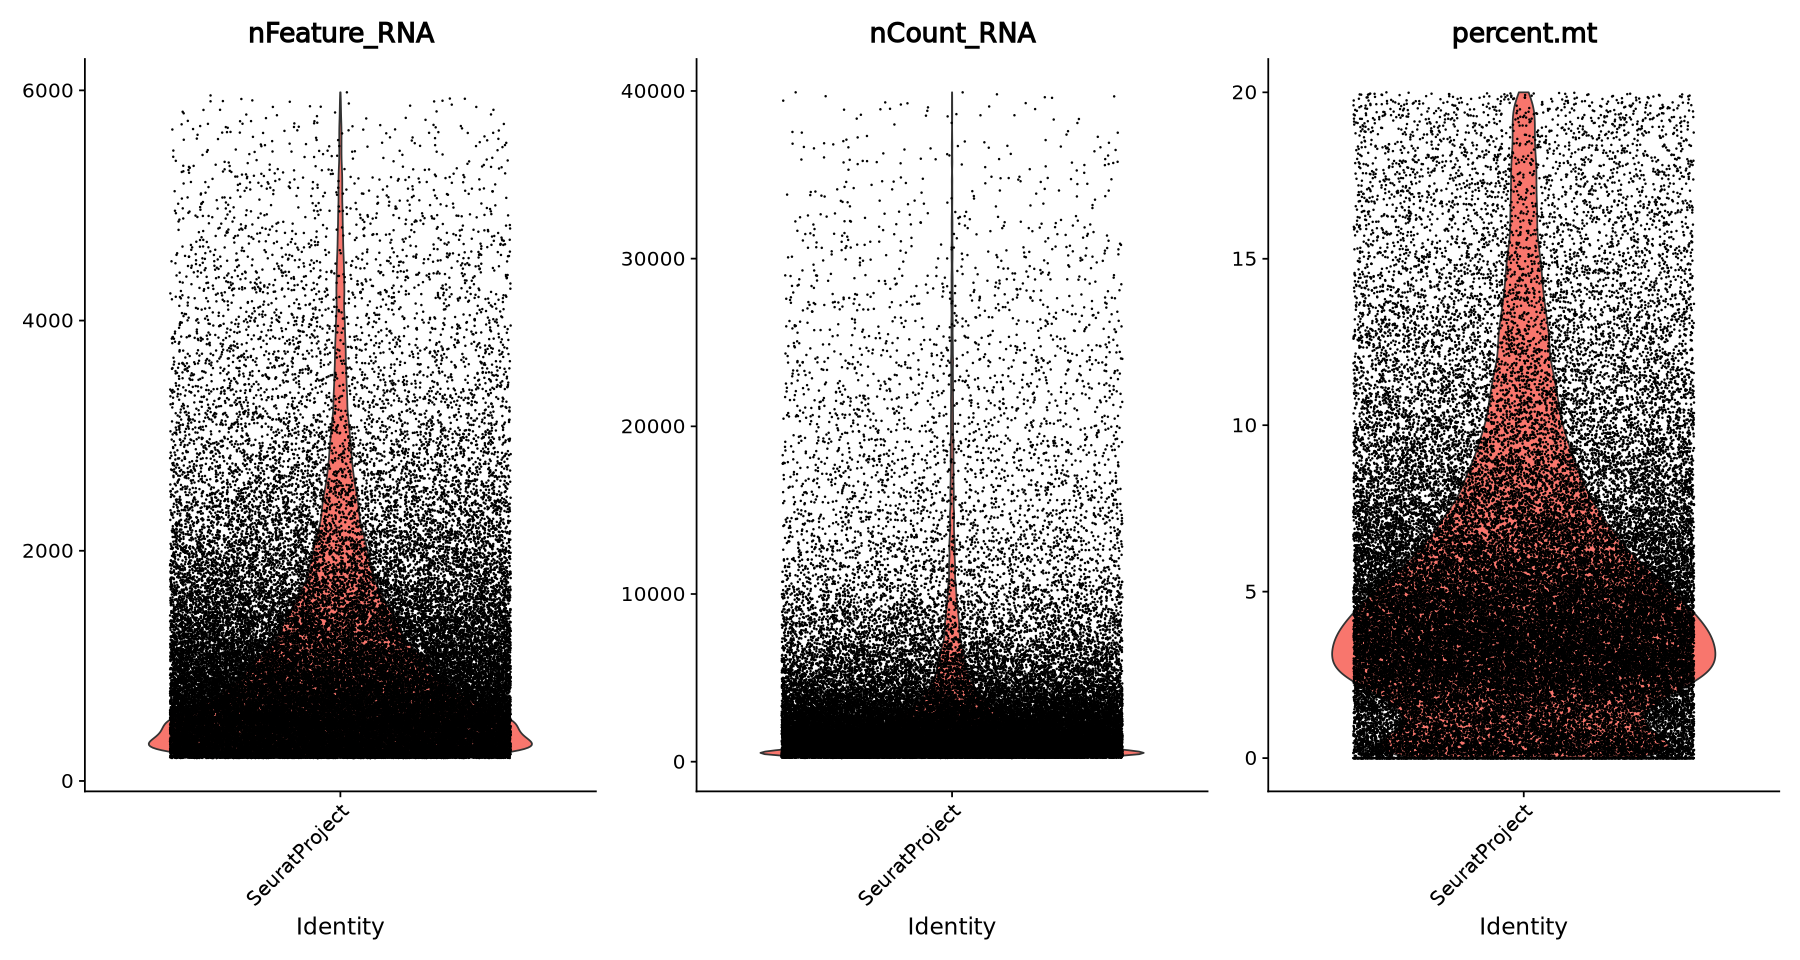

In [35]:
#QC Steps 
HNSCC[["percent.mt"]] <- PercentageFeatureSet(HNSCC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(HNSCC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [36]:
#Normalise the data
HNSCC <- NormalizeData(HNSCC)

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14



In [37]:
#Find variable features
HNSCC <- FindVariableFeatures(HNSCC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer counts.11

Finding variable features for layer counts.12

Finding variable features for layer counts.13

Finding variable features for layer counts.14



In [38]:
#Scale the data
HNSCC <- ScaleData(HNSCC, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [39]:
#Run PCA
HNSCC <- RunPCA(HNSCC, features = VariableFeatures(object = HNSCC))

PC_ 1 
Positive:  SPARC, CALD1, BGN, COL1A2, COL6A2, COL1A1, COL3A1, IGFBP7, COL6A1, COL6A3 
	   PCOLCE, COL5A2, LUM, THY1, MYL9, AEBP1, SERPINF1, C1S, TIMP1, CTSK 
	   COL4A2, COL5A1, FN1, FSTL1, NNMT, POSTN, SERPINH1, SERPING1, COL18A1, TPM2 
Negative:  CD74, HLA-DRA, CORO1A, CD52, RGS1, LCP1, HLA-DRB1, HLA-DPA1, IL2RG, DUSP2 
	   HLA-DPB1, FYB, CD69, CD3E, HLA-DQA1, CD83, ALOX5AP, HLA-DQB1, IL7R, LTB 
	   CD3D, UCP2, SAMSN1, SELL, CD7, CCL4, ZNF331, ITGB2, HLA-DRB5, CD2 
PC_ 2 
Positive:  SFN, S100A2, KRT6A, KRT5, KRT17, KRT14, LAMC2, COL17A1, CDH3, FERMT1 
	   CDKN2A, C19orf33, LAMB3, ITGB6, DSP, DSC3, SERPINB5, LAMA3, PERP, ANXA8 
	   FST, CH17-360D5.2, ANXA8L1, TP63, CALML3, FGFBP1, LY6K, ITGA6, PTHLH, ITGB4 
Negative:  A2M, HLA-DPB1, HLA-DRB5, SPARCL1, FCGRT, MGP, HLA-DQA1, TYROBP, HLA-DRB1, FCER1G 
	   CTSS, TMEM176B, HLA-DPA1, ENG, S100A4, TXNIP, RNASE1, HLA-DMA, PECAM1, HLA-DQB1 
	   TMEM176A, AIF1, C1QB, C1QC, C1QA, HLA-DRA, PMP22, APOE, MS4A6A, C1orf54 
PC_ 3 
Positive:  PL

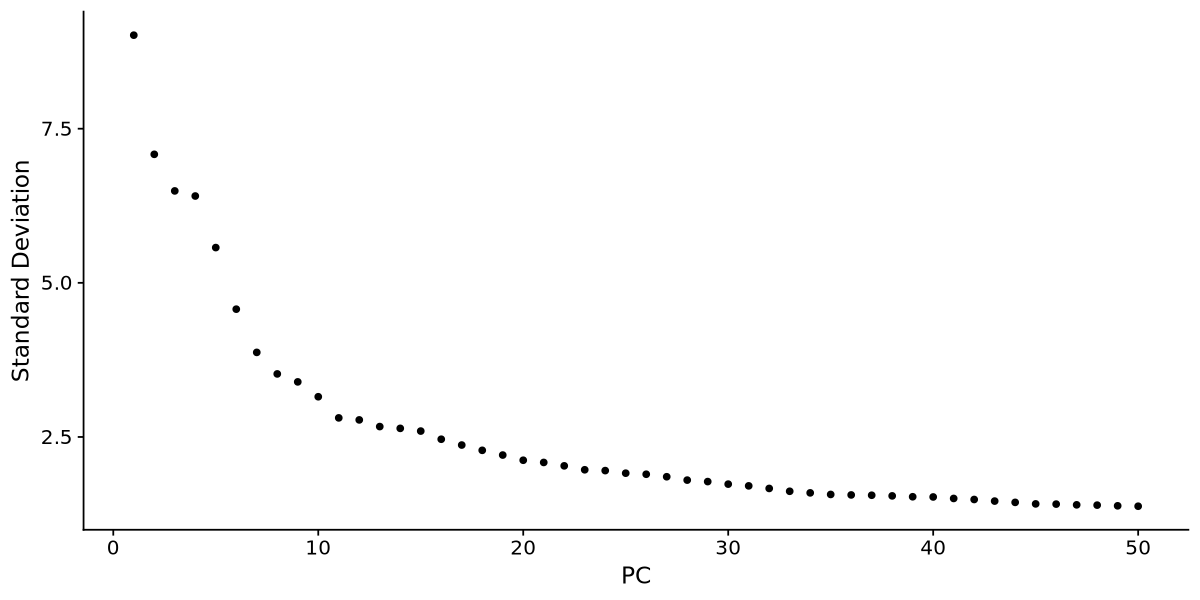

In [40]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(HNSCC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [41]:
#Find neighbours (make sure number matches no. features chosen above)
HNSCC <- FindNeighbors(HNSCC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [42]:
#Run UMAP
HNSCC <- RunUMAP(HNSCC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


12:49:15 UMAP embedding parameters a = 0.9922 b = 1.112

12:49:15 Read 53459 rows and found 40 numeric columns

12:49:15 Using Annoy for neighbor search, n_neighbors = 30

12:49:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:49:19 Writing NN index file to temp file /scratch/temp/9794890/RtmpEZVlnr/file22e95d5339aef4

12:49:19 Searching Annoy index using 1 thread, search_k = 3000

12:49:32 Annoy recall = 100%

12:49:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:49:34 Initializing from normalized Laplacian + noise (using RSpectra)

12:49:36 Commencing optimization for 200 epochs, with 2422908 positive edges

12:49:55 Optimization finished



In [43]:
#Cluster, resolution here set to 0.2
HNSCC <- FindClusters(HNSCC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 53459
Number of edges: 2024427

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9708
Number of communities: 17
Elapsed time: 10 seconds


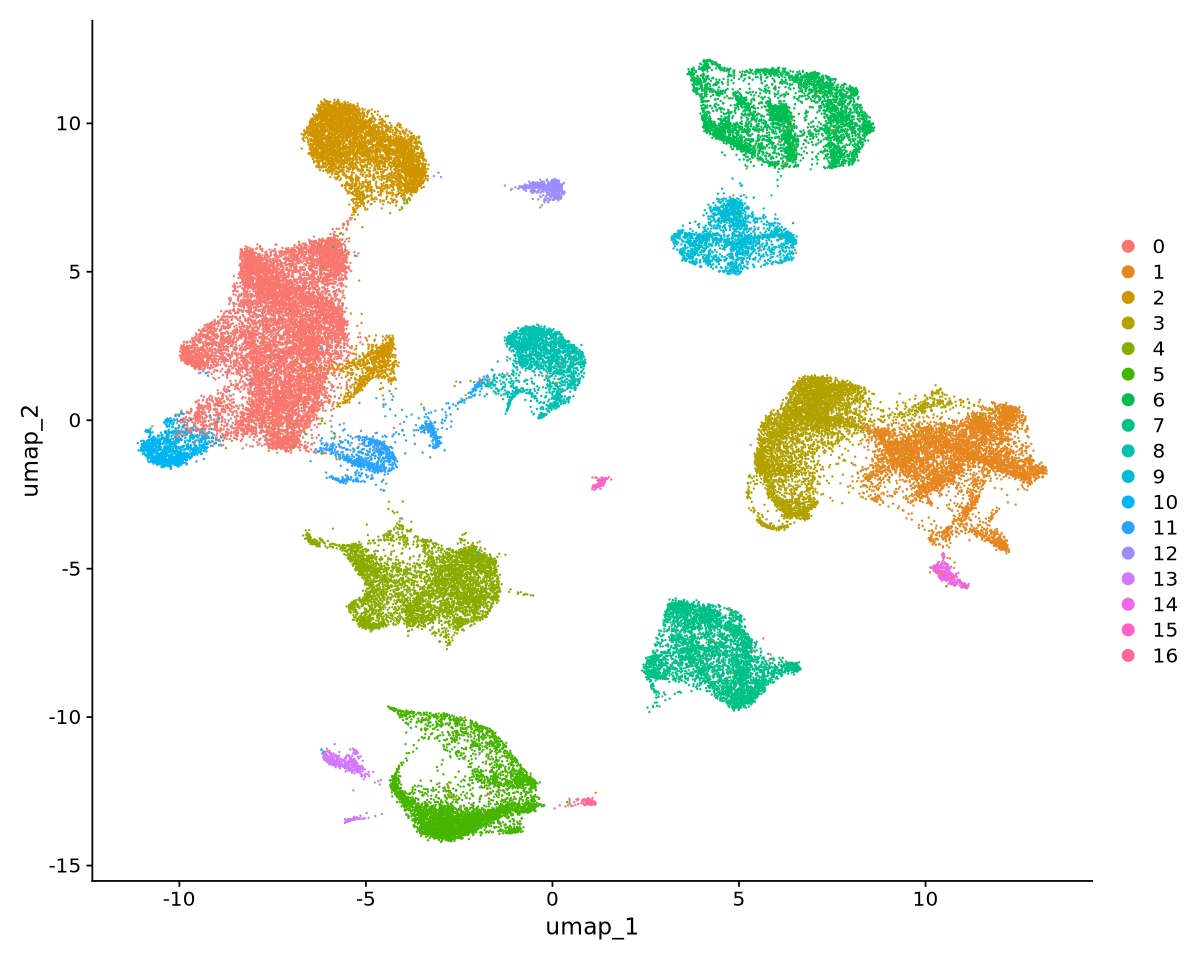

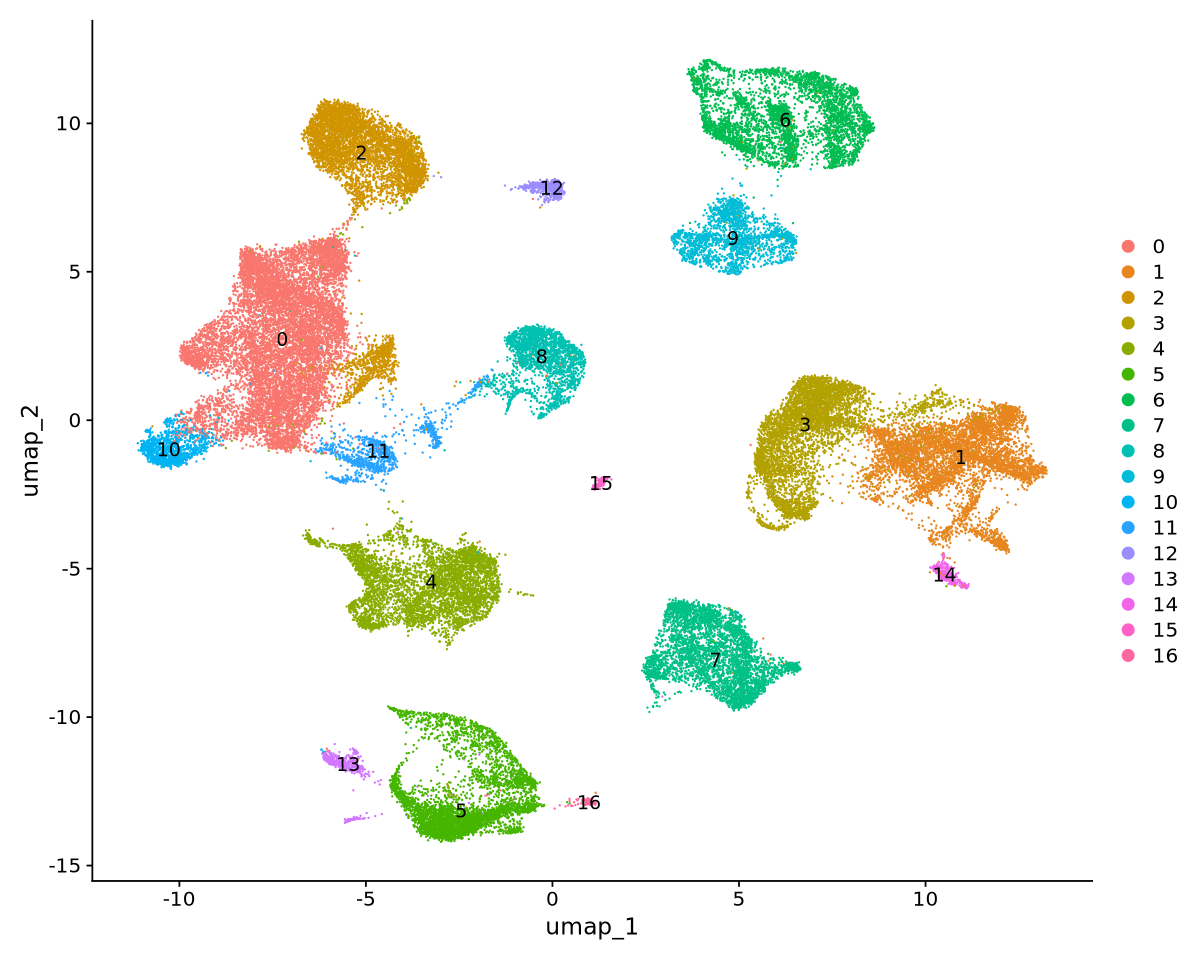

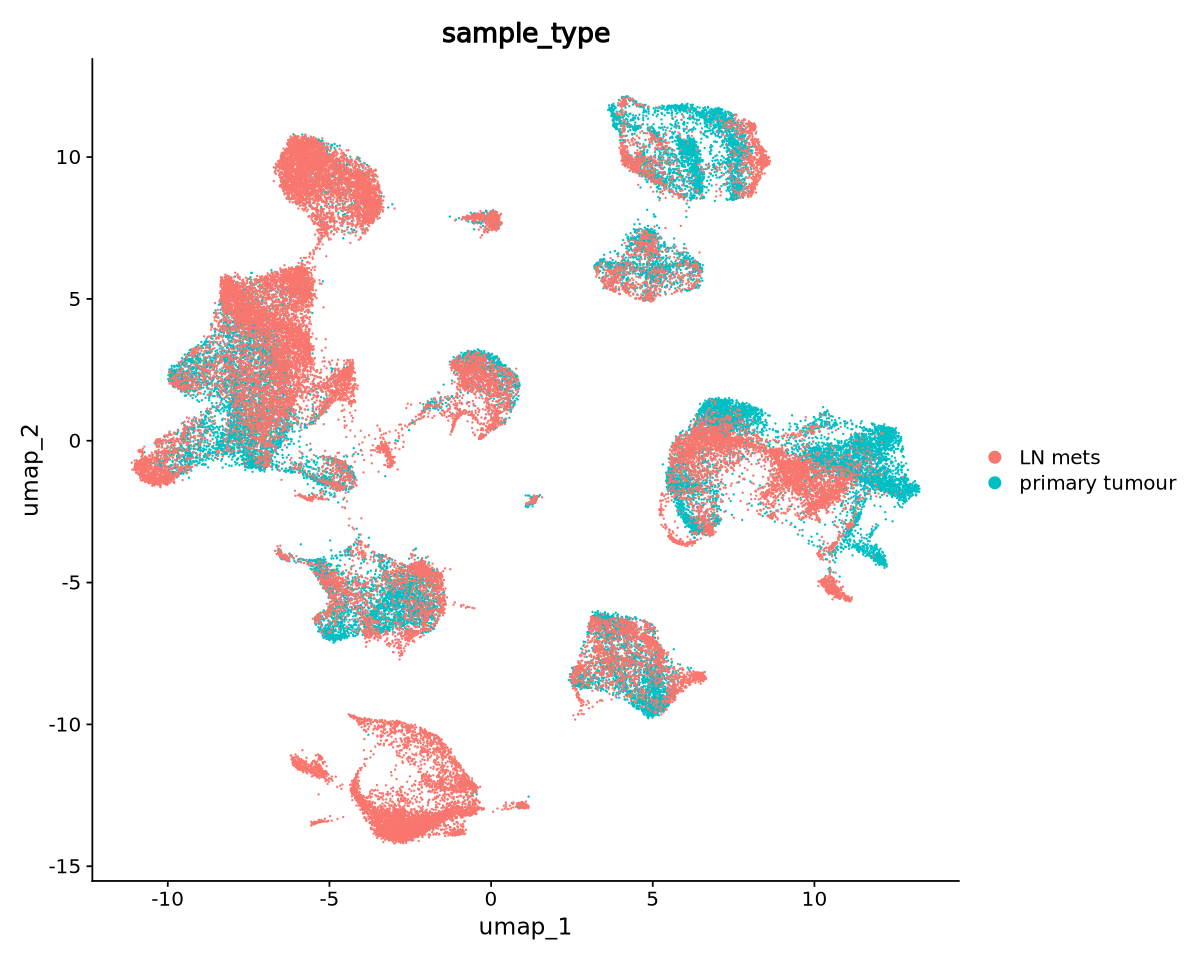

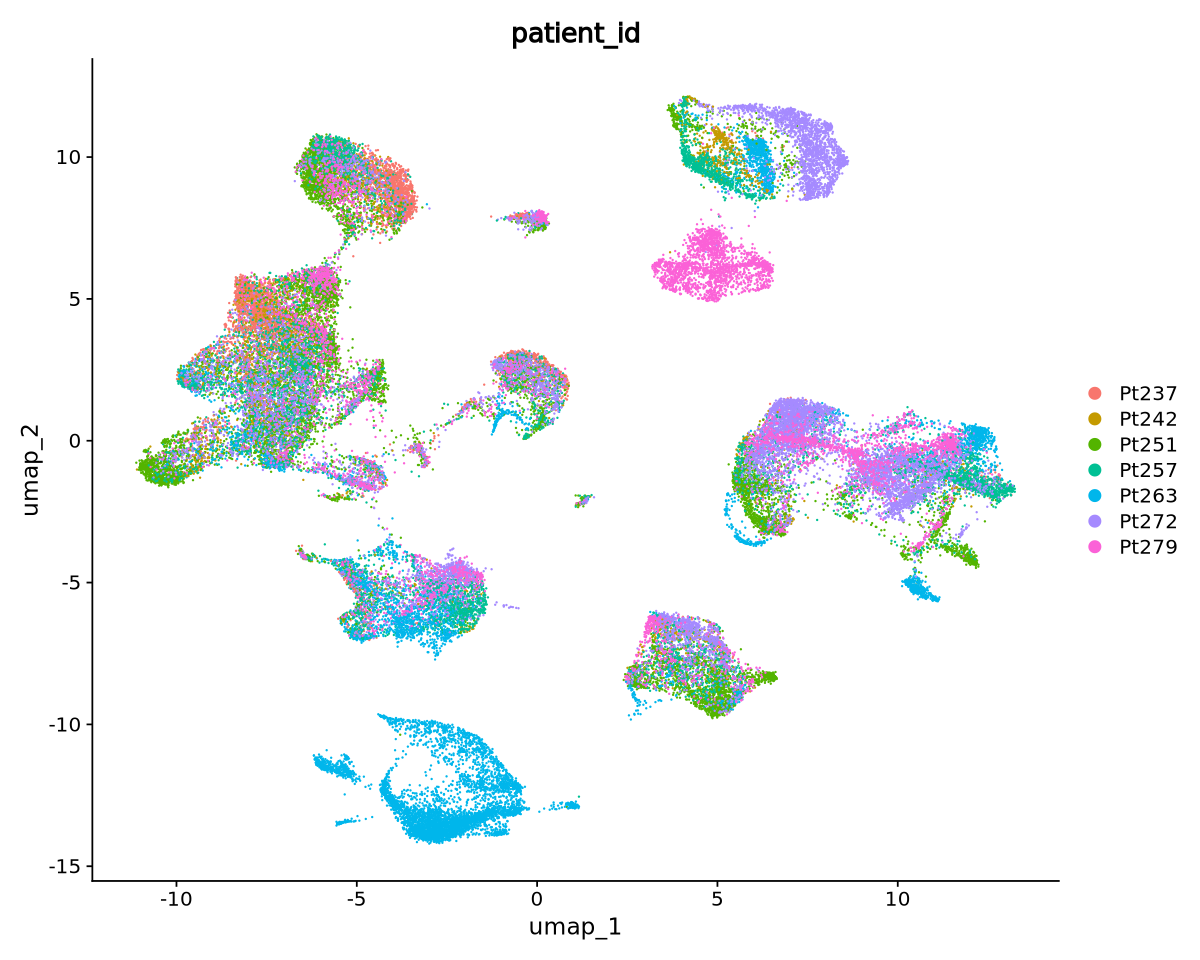

In [44]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(HNSCC, reduction = "umap")
DimPlot(HNSCC, reduction = "umap", label=TRUE)
DimPlot(HNSCC, reduction = "umap", group = "sample_type")
DimPlot(HNSCC, reduction = "umap", group = "patient_id")

In [45]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(HNSCC, file = "/scratch/user/s4436039/scdata/GSE188737/GSE188737.RDS")

In [3]:
HNSCC <- readRDS(file = "/scratch/user/s4436039/scdata/GSE188737/GSE188737.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

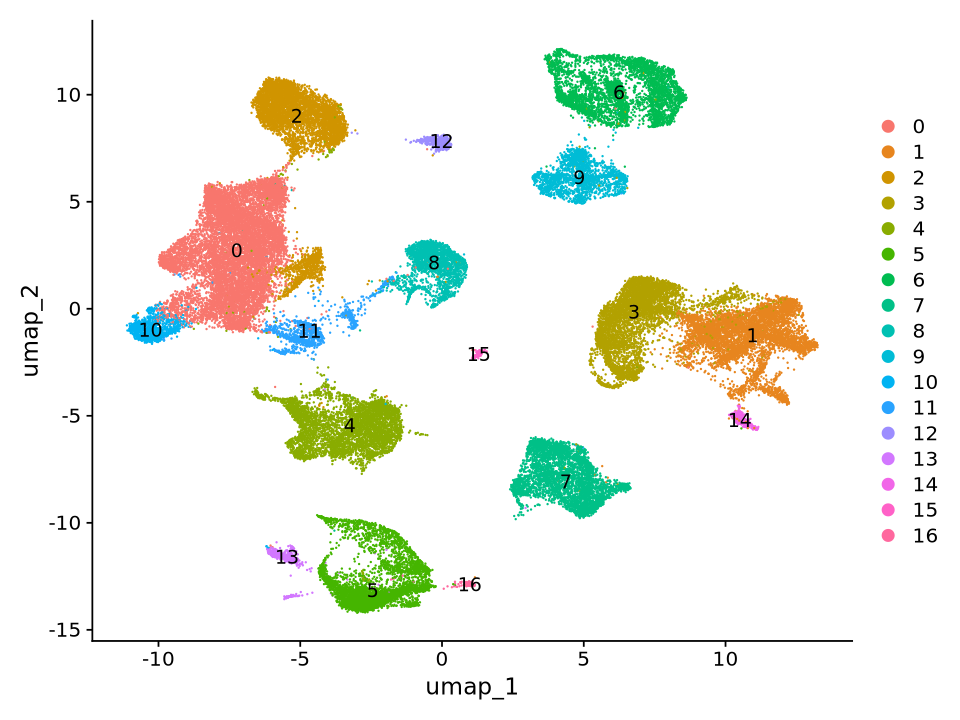

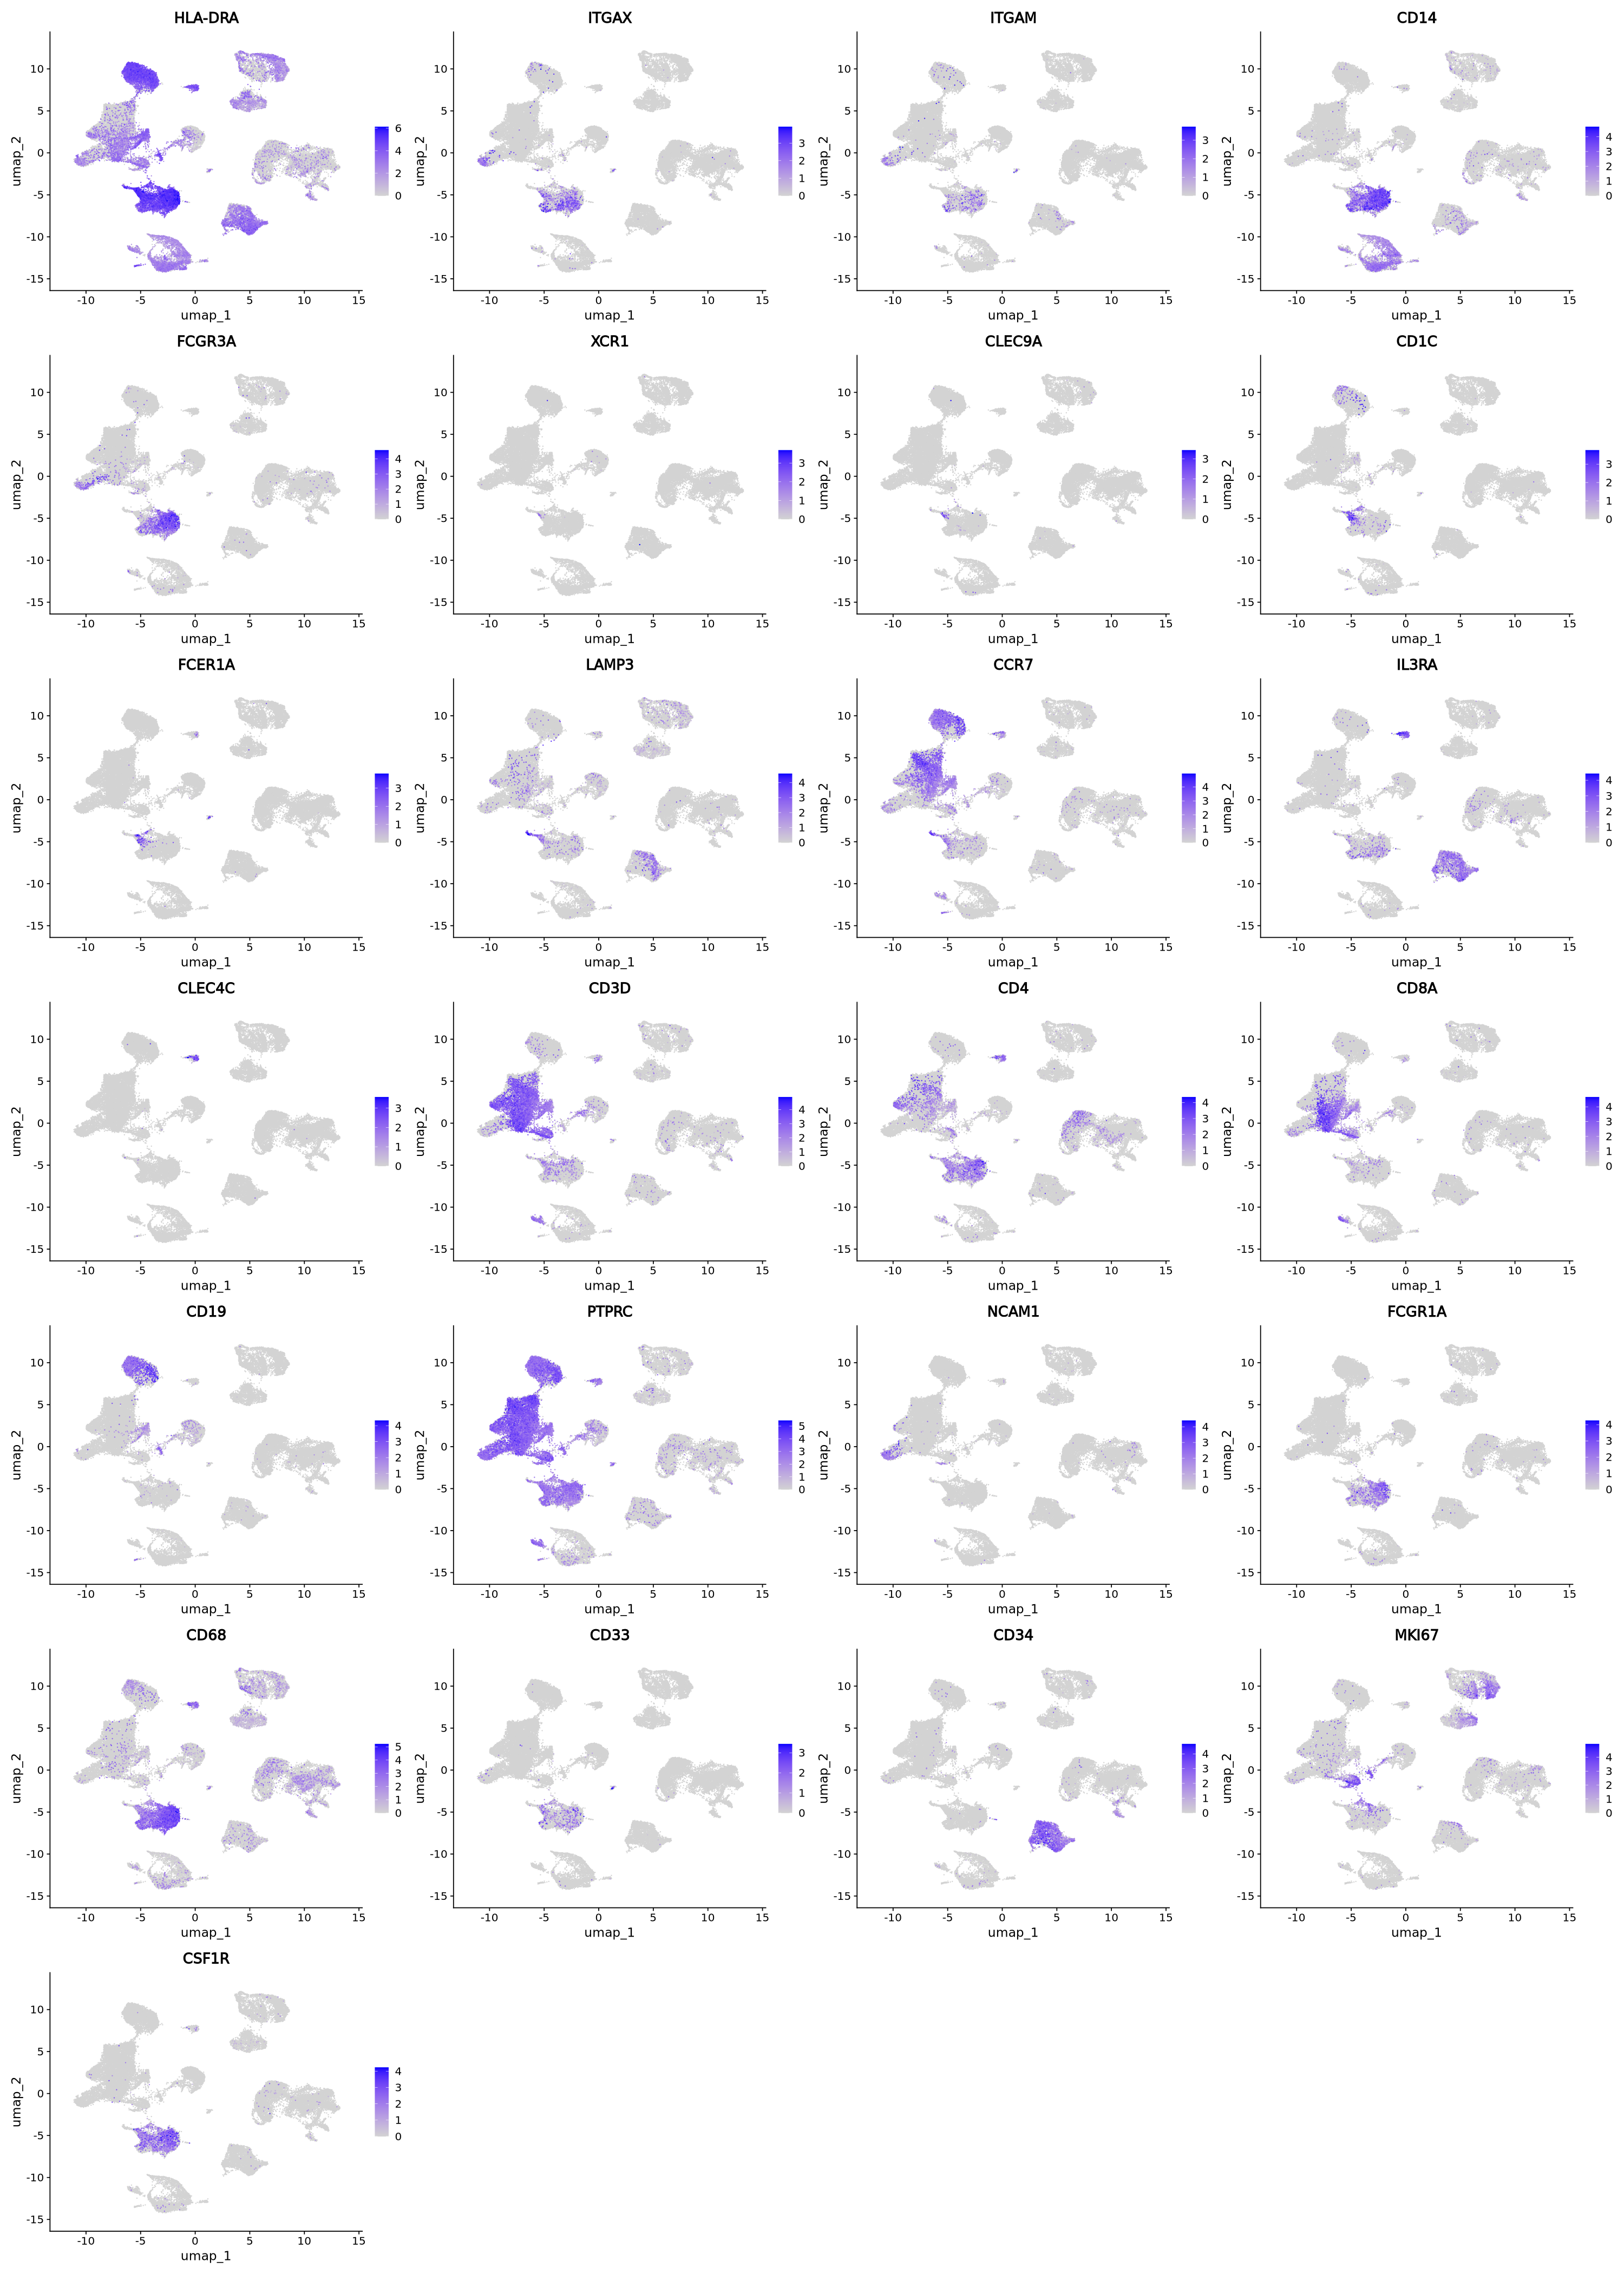

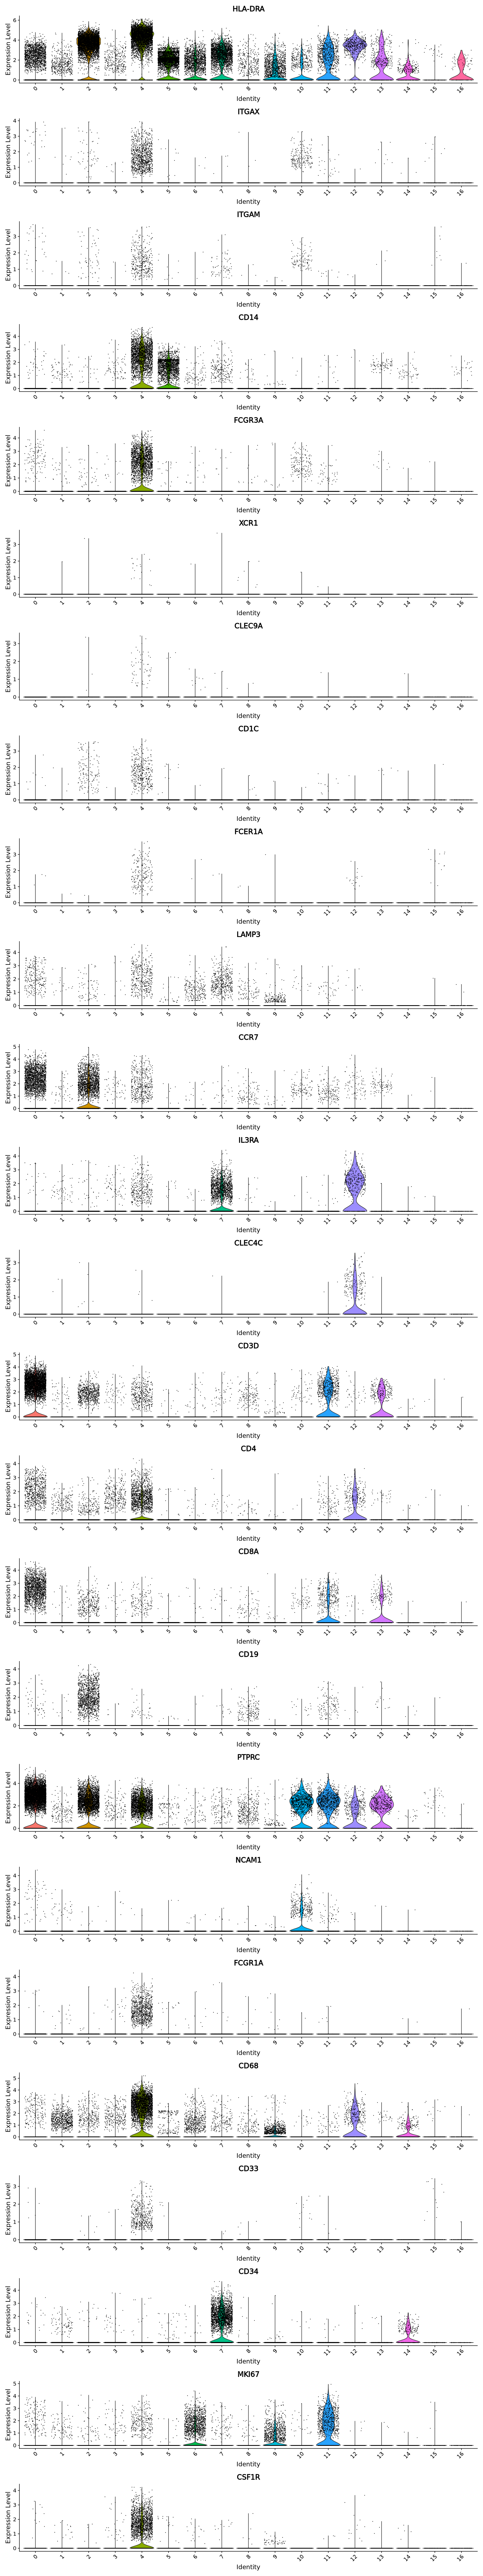

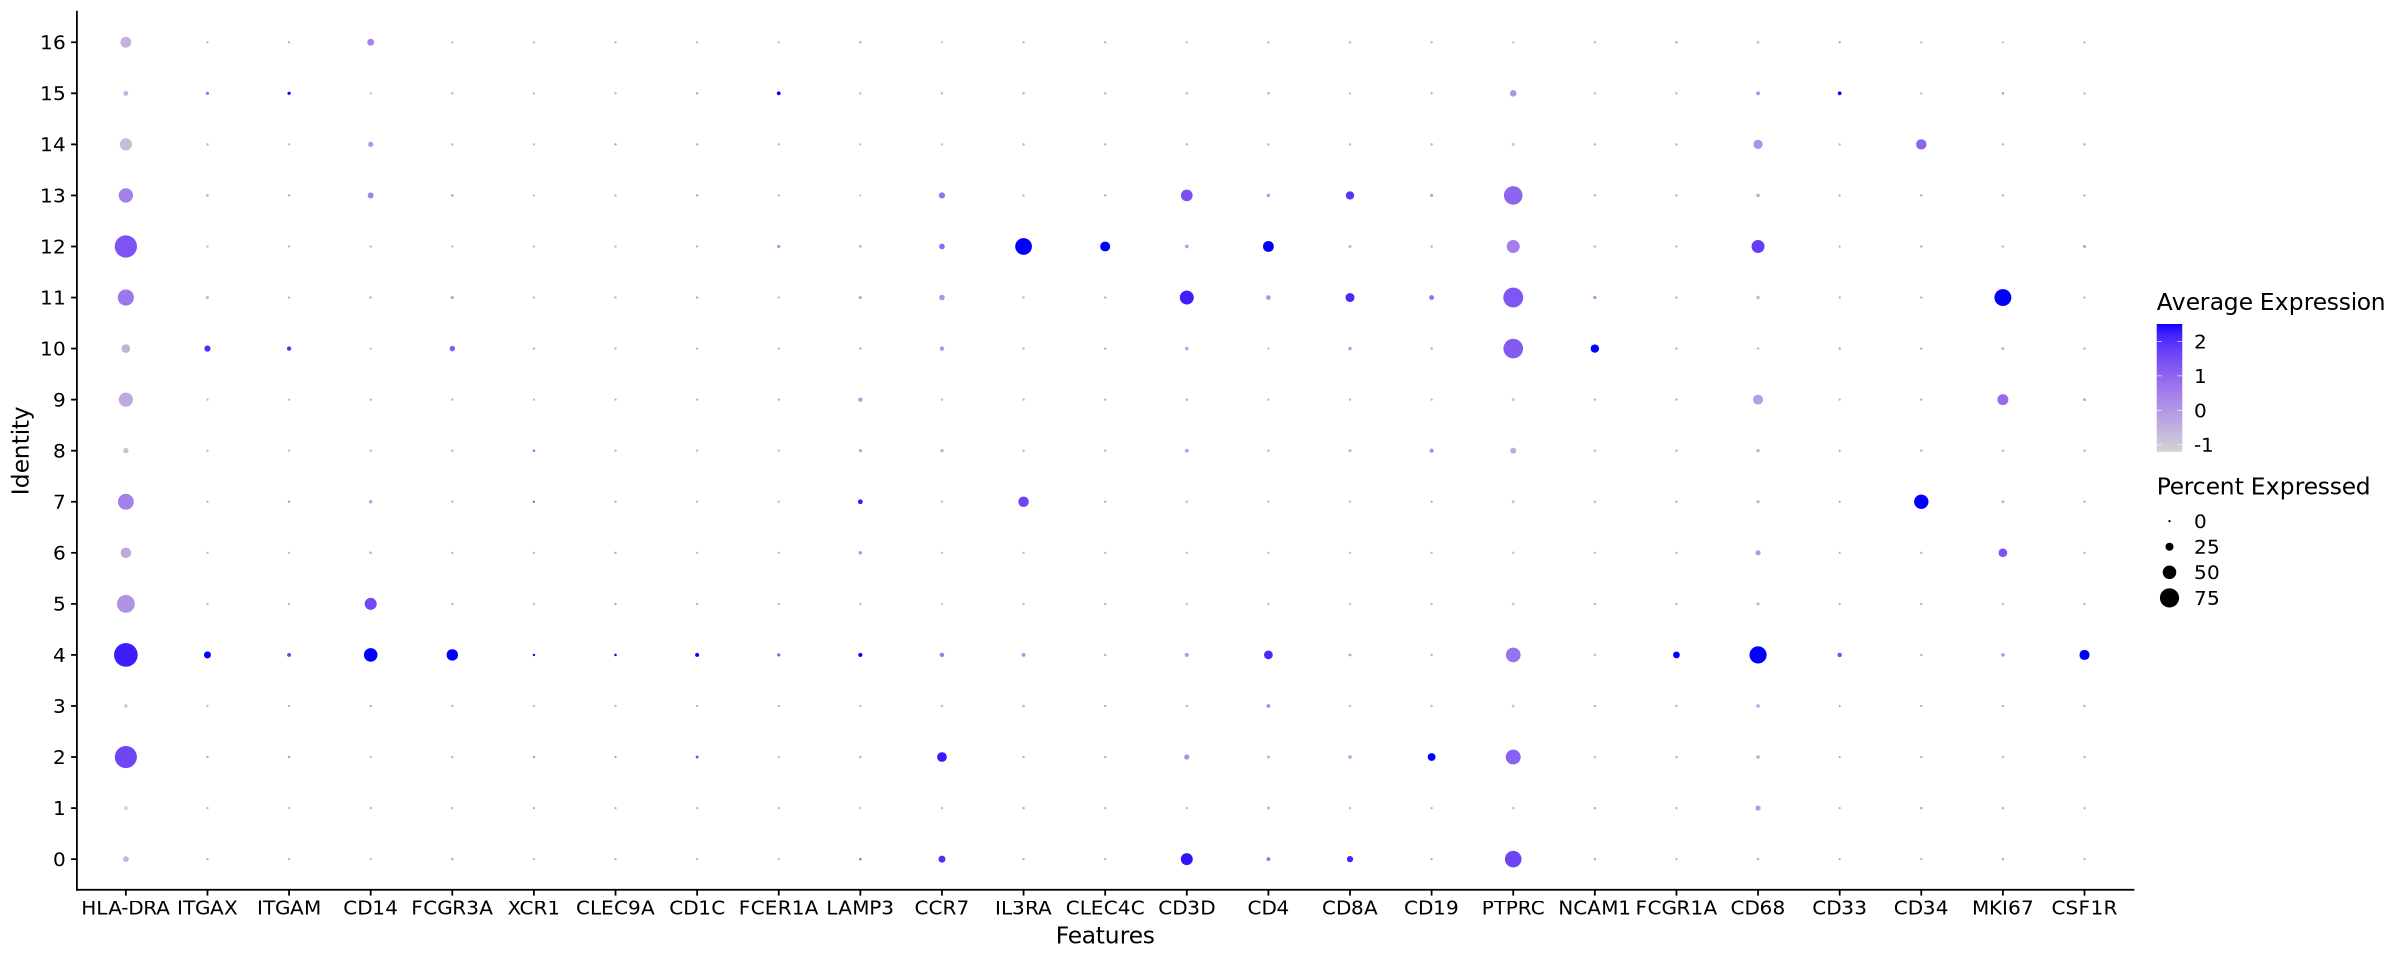

In [5]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(HNSCC, reduction = "umap", label=TRUE)

options(repr.plot.height=35, repr.plot.width=25)
FeaturePlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

### looks like cluster 4 is the myeloid cells, now subsetting out this cluster

In [6]:
head(HNSCC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 10X_hn     1900        991        
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 10X_hn     1057        696        
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 10X_hn     5465       2312        
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 10X_hn     3180       1530        
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 10X_hn     5802       2475        
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 10X_hn     2281       1189        
                                          sampleID percent.mt origin patientID
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 1        3.105263   HN237P HN237    
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 1        9.082308   HN237P HN237    
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 1        4.300091   HN237P HN237    
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 1        5.345912   HN237P HN237    
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 1        3.154085   HN237P HN237    
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 1        7.759754   HN237P HN237    
                                          P_Mid seurat_clusters genecount
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 P     1               500-1000 
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 P     1               500-1000 
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 P     1               1000-3000
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 P     1               1000-3000
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 P     1               1000-3000
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 P     1               1000-3000
                                          cell_type sample_type    cancer_type
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 CAFs      primary tumour HNSCC      
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 CAFs      primary tumour HNSCC      
                                          patient_id
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 Pt237     
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 Pt237     
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 Pt237     
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 Pt237     
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 Pt237     
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 Pt237     
                                          sample_id                  
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 GSE188737_HNSCC_237_Primary
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 GSE188737_HNSCC_237_Primary
                                          RNA_snn_res.0.2
GSE188737_HNSCC_HN237P_AAAGCAACAAGCGCTC-1 1              
GSE188737_HNSCC_HN237P_AAGTCTGAGGTGCTAG-1 1              
GSE188737_HNSCC_HN237P_ACCAGTACATCTACGA-1 1              
GSE188737_HNSCC_HN237P_ACGAGGAGTCGCGAAA-1 1              
GSE188737_HNSCC_HN237P_ACTGATGGTACTTCTT-1 1              
GSE188737_HNSCC_HN237P_AGCCTAAAGGTTCCTA-1 1

In [7]:
myeloid_HNSCC <- subset(HNSCC, subset = RNA_snn_res.0.2 %in% c("4"))

In [8]:
HNSCC
myeloid_HNSCC

An object of class Seurat 
23148 features across 53459 samples within 1 assay 
Active assay: RNA (23148 features, 2000 variable features)
 29 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
23148 features across 4897 samples within 1 assay 
Active assay: RNA (23148 features, 2000 variable features)
 29 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, scale.data
 2 dimensional reductions calculated: pca, umap

In [9]:
saveRDS(myeloid_HNSCC, "/scratch/user/s4436039/scdata/GSE188737/GSE188737_myeloid.RDS")

#### Following the above then need to move entire GSE188737 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE188737/ /QRISdata/Q5935/nikita/scdata/GSE188737
```